## 第三届滴滴Di-Tech算法大赛-智慧信号灯
城市的拥堵愈演愈烈，逐渐成为社会发展的顽疾。交通信号灯作为城市交通管控的重要环节，对路网通行效率有着至关重要的意义。然而今天的绝大部分信号灯仍未有足够的智慧，不能很好的调节时空资源与交通需求相匹配，甚至对道路交通状态一无所知。以滴滴车辆为代表提供的移动出行数据为城市交通管控提供了一个新思路，大范围、高质量的车辆轨迹为城市交通管控提供了大量低成本、覆盖广的移动检测数据，必将赋能信号灯变得更有效率。










## 大赛目标：基于滴滴的轨迹数据，对交叉口的控制方案进行优化。

## 1. 什么是轨迹数据？
  1. 每隔3秒采集一次滴滴车的id，采集时间戳，坐标位置（x,y）,速度，是否载客 
  2. 依据这些数据可以画出车辆的变化距离随时间的变化而变化的时空轨迹图：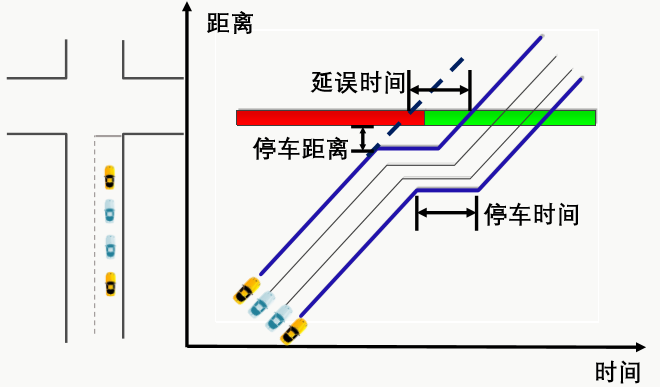
  4. 轨迹线的斜率是车的行驶速度 
  5. 停车时间：遇到红灯，轨迹线和x轴平行，速度为0，平行的那一段，就是等红灯的时间，时间增加，距离不变。 
  6. 延误时间：假设没有遇到红灯，直接通过路口，和遇到了红灯，等绿灯亮后通过路口之间的时间差。 
  7. 停车时间==延误时间 
  8. 停车距离：车辆的停车位置和停车线之间的距离差。 



## 2. 相位与相序 
1. 相位：交叉口的每一种控制状态称为一个相位。对各个进口道不同方向所显示的不同信号灯的颜色的组合。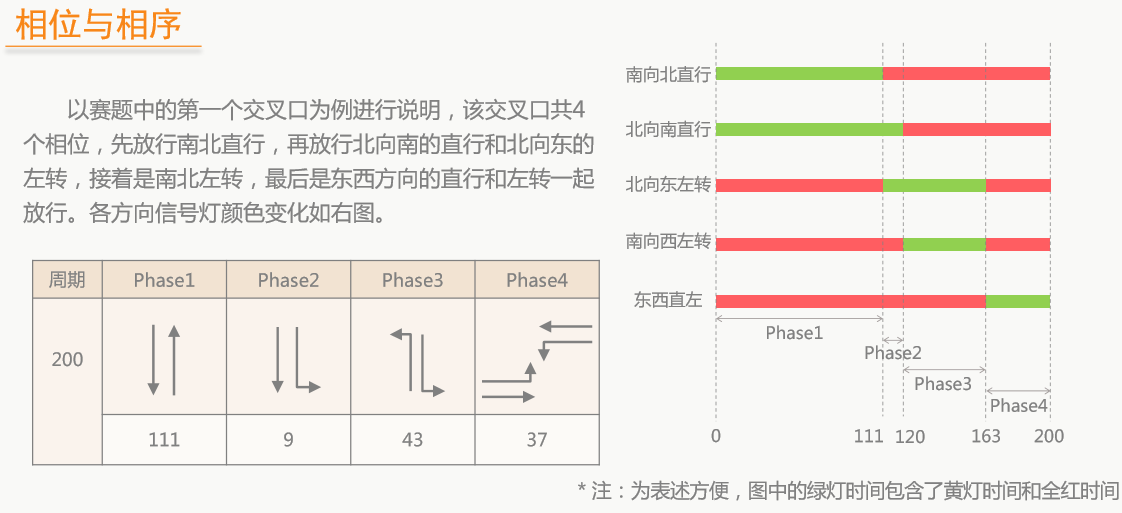

2. 相序：一个周期内，各个方向的车流或得通行权的先后顺序。先放行东西方向的车流，后放行南北方向的车流。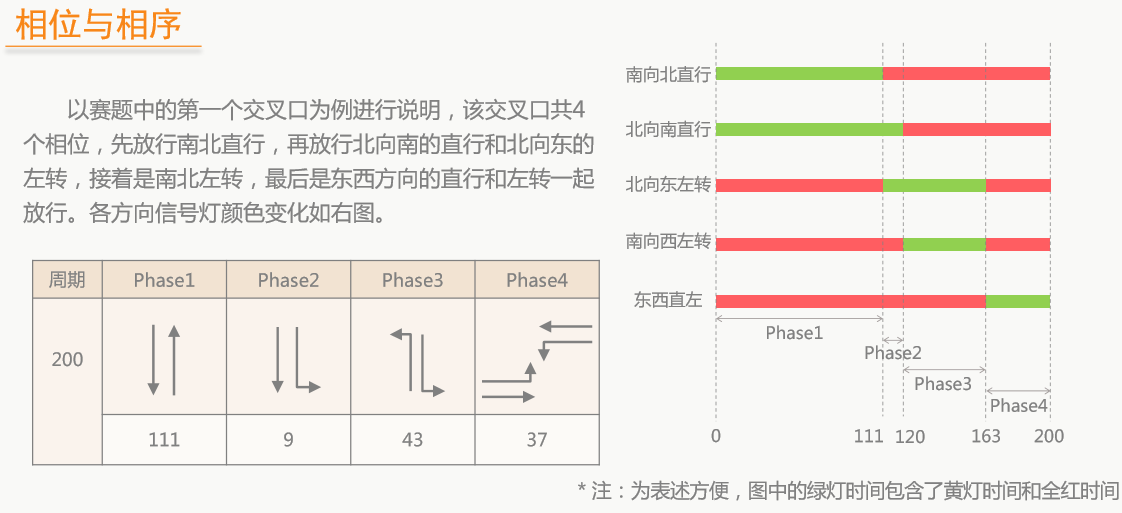 




## 3. 信号控制的时间参数
1. 信号周期：交叉口的信号灯按照特定顺序循环显示，信号灯按设定的向位顺序显示一个完整的循环，称为一个信号周期cycle 
2. 周期时间：信号灯色按照设定的向位顺序显示一个完整的循环所需要的时间。C 
3. 绿灯时长：某一股车流在一个信号周期内，所获得的绿灯时间，即绿灯启亮到绿灯结束的时间差，用符号 G 表示 
4. 黄灯时长：黄灯启亮时，司机应停车，但离停车线很近因而无法正常停车的车辆允许通行。  
5. 全红时长：全红时间是本相位黄灯末至下一相位绿灯初的时间间隔，目的在于清空交叉口内的车辆。 
6. 相位时长：绿灯时长，黄灯时长，全红时长的总和。 
7. 损失时间 ：损失时间是指，相位切换过程中，由于交通安全及车流运行特性等原因，相位时间内没有被充分利用的时 间（比如绿灯刚启亮时司机的反应延迟），整个周期内总的损失时间用 L 表示 
8. 有效绿灯时间 ：有效绿灯时间等于绿灯时间与黄灯时间之和减去启动损失时间，用符号 Ge 表示。各关键车流的有效绿灯 时间的总和，加上总损失时间 L，等于周期时长。  
9. 绿信比(𝜆) ：绿信比（Split）是指某车流或某相位的有效绿灯时间与周期时长的比值，用符号𝜆表示。 𝜆= Ge / C 
10. 相位差 ：相位差（Offset）是信号协调控制中的关键参数，是指 每个交叉口的某一参考相位的绿灯开始时间与指定的某一系统时间的差值。 本次大赛采用的是绝对相位差，并要求相位差的取值范围为 [ 0，C )。 



## 4. 交通流参数
1. 交通流量（q） ：单位时间内通过道路某一截面的车辆数量。  
2. 饱和流量（S） ：单位时间内通过道路某一截面（通常为交叉口停车线）的最大车辆数量。  
3. 车道交通流量比（y） ：指道路的实际流量与饱和流量之比，在一定程度上反映了道路的拥堵状况。 y =q/S  
4. 通行能力（Q） ：指交叉口的某个方向在给定的绿信比下的单位时间最大通行车辆数量。Q=S*𝜆 
5. 饱和度（x） ：指道路的实际流量与通行能力之比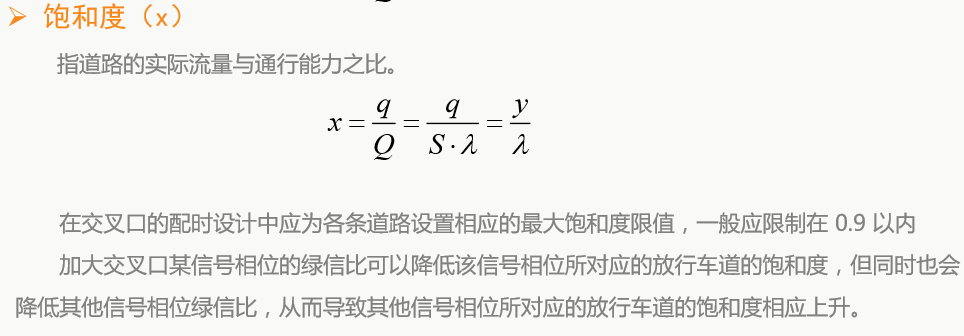
6. 在交叉口的配时设计中应为各条道路设置相应的最大饱和度限值，一般应限制在 0.9 以内  
7. 加大交叉口某信号相位的绿信比可以降低该信号相位所对应的放行车道的饱和度，但同时也会 降低其他信号相位绿信比，从而导致其他信号相位所对应的放行车道的饱和度相应上升。 


## 5. 性能指标参数
1. 延误时间 :指车辆在受阻情况下通过交叉口所需时间与正常行驶同样距离所需时间之差。 交叉口的平均延误时间是指通过交叉口的车辆的延误时间平均值。 
2. 停车次数 :车辆在交叉口因为受阻而被迫停车等待的次数。 
3. 评价指标（Performance Index）计算： PI = 全部车辆平均延误(单位为s)+10×全部车辆平均停车次数； 方案最终得分 =（1/PI ） × 1000 

## 6. 优化参数说明
1. 相位时长:相位时间的长短直接关乎该相位车流的延误和停车。周期不变的情况下，增加相位时长，可以减少 该相位车流的延误和停车，缓解该方向的拥堵；与此同时，一个相位时长的增加，也意味着其他相位时 长的减少，会增加其他方向交通的拥堵。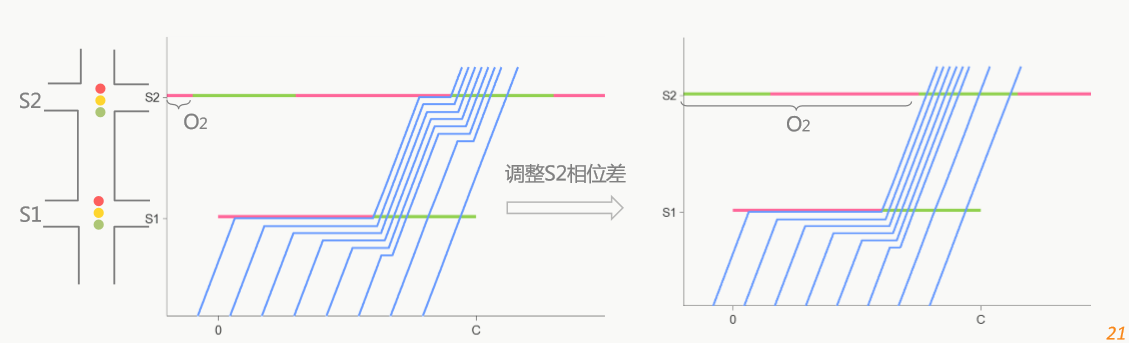

2. 周期时长:周期时长的大小对交叉口车辆延误时间有直接的影响。在绿信比不变的情况下，通常周期时长越长， 车流的延误时间也越大。但是周期时长也不能太短，特别是在交通流量大的路口，交叉口的总损失时间 是一定的，缩短周期，可供通行的绿灯时间比例也会减小，容易造成交叉口过饱和（本周期到达的车辆 需要在下一周期的绿灯时间才能通过），带来更多的 延误和停车。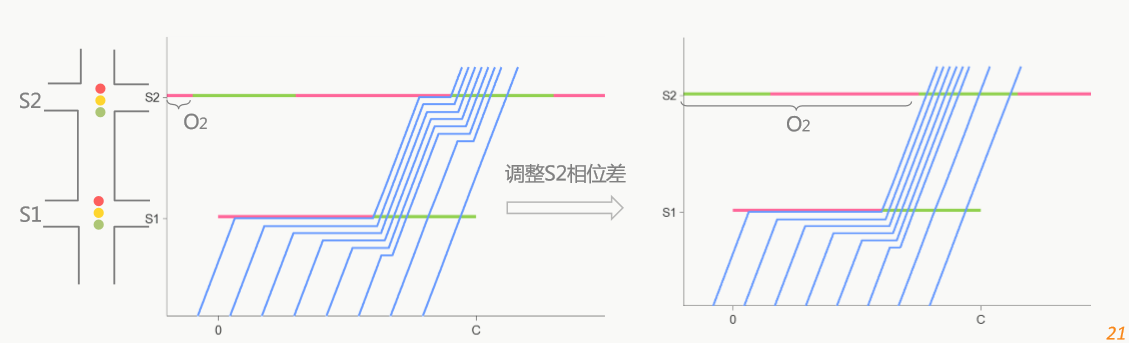
 
3. 相位差:相位差设置的主要目的是让协调方向的车流减少延误和停车。 • 相位差的调整会同时影响沿着主干道行驶的两个直行方向的车流，需要综合考虑两个方向。 • 当协调方向交通流量较大的情况下，相位差的设置需优先顾及排队长度较大的路段，避免排队长度 延伸到上游交叉口，影响其他方向的车流通行。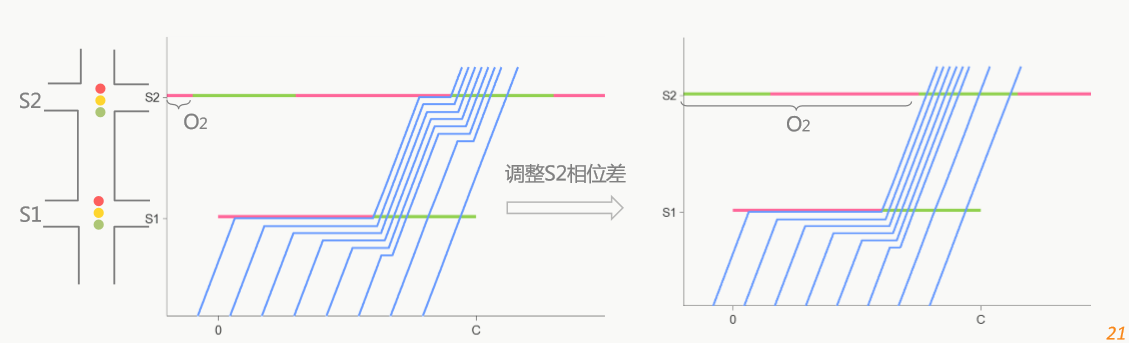

In [3]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 3 and version_info.minor != 5:
    raise Exception('请使用Python 3.5来完成此项目')

In [6]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()
# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入轨迹数据
data = pd.read_csv("data.csv")
# 成功 - 显示第一条记录
display(data.head(n=5))

,vehicle-id,time,x-coordinate,y-coordinate,speed,category
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.4739,55061.50695,6.6,0
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.8928,55051.68512,6.1,0
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.3117,55041.86329,6.2,0
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.6177,55030.25567,6.9,0
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.5849,55019.54095,7.2,0


In [8]:
#数据统计信息
print (data.describe())

               time   x-coordinate   y-coordinate          speed  \
count  6.093950e+05  609395.000000  609395.000000  609395.000000   
mean   1.494441e+09  521468.436222   55857.294875       4.533246   
std    3.632164e+05     110.134663    1395.999743       5.307853   
min    1.493852e+09  520955.288800   53380.188240       0.000000   
25%    1.494203e+09  521411.566400   54790.067290       0.000000   
50%    1.494458e+09  521431.598600   55736.534540       2.100000   
75%    1.494807e+09  521537.325200   57083.911040       8.700000   
max    1.494983e+09  521920.177500   58715.227710     101.800000   

            category  
count  609395.000000  
mean        0.895272  
std         0.306203  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  


In [9]:
#import matplotlib.pylab as pyl
#dt=data.T
#hits=dt.values[2]
#com=dt.values[3]
#pyl.plot(com,hits,'o')
#pyl.show()

## 云溪小队第一次微信语音讨论
### 参会成员 
叶剑，周慧明，张玉，董建华
### 讨论时间
2017-12-2
### 讨论话题
1. **考虑建立具有泛化能力的模型**<br>
根据分析原有的轨迹数据和模板方案，得出一些规律，比如一个路口，有4个相位，相位周期固定200秒，每个相位的绿灯时间此消彼长，加起来为200表，那么如何智能的合理分配没个相位的时间，是模型要考虑的。 比如根据交通流量、通行能力和饱和度等调节，如何算出这个路口这个相位的交通流量、通行能力和饱和度等？
这里我觉得原有轨迹数据还是有必要split成训练数据和测试数据的
2. **如何得到PI？ 建立评估模型** <br>
算出平均延误时间和全部车辆平均停车次数
3. **模型的调优** <br>
模型调优基于评估模型，评估模型入参轨迹数据和模板方案，调优目标是PI，PI越小，模型越优。
模板方案，那34个相位差和相位时间数据是需要调节的地方，也是我们最终提交评审的数据。
4. **原始数据---》运行原理---》新的参数--》基于相同原理的新计算模型---》优化目标函数 **

### 结论：
2017-12-9继续开第二次讨论<br>
第二次讨论之前，每人初步尝试得出评估模型PI

## 云溪小队第二次微信语音讨论
### 参会成员
叶剑，周慧明，张玉，董建华
### 讨论时间
2017-12-9
### 讨论话题
1. **确立机器学习模型**<br>
使用强化深度学习模型<br>
参考资料：<br>
**[强化学习（reinforcement learning)]( https://www.zhihu.com/question/49230922/answer/245300772)**<br>
**Reinforcement Learning For Adaptive Traﬃc Signal Control ** <br>
**Traffic Signal Timing via Deep Reinforcement Learning ** <br>
**Using a Deep Reinforcement Learning Agent for Traffic Signal Control ** <br>


### 结论：
2017-12-16继续开第三次讨论<br>


## 云溪小队第三次微信语音讨论
### 参会成员
叶剑，周慧明，张玉，董建华
### 讨论时间
2017-12-17
### 讨论话题
1. **慧明发表对强化学习和智慧信号灯赛题的理解**<br>
强化学习是机器学习大家族中的一大类<br>
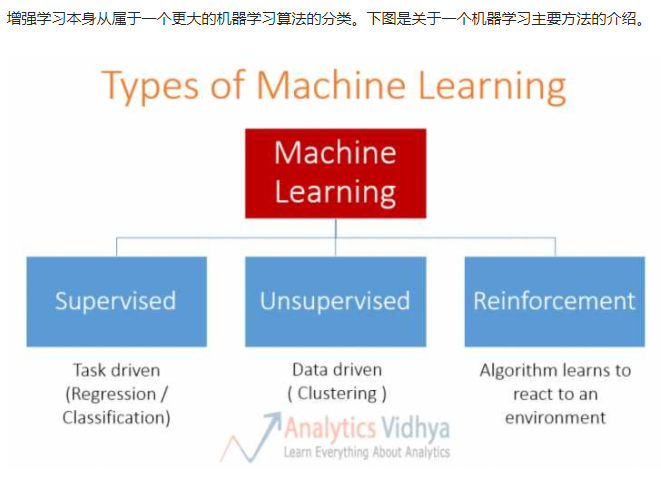

智慧信号灯问题：<br>
agent   路灯的大脑<br>
action   控制每一个相位的时间<br>
env     基于目前的状态<br>
reward   j结果，是好 +reward 是坏  -reward<br>

解决方法：<br>
基于策略， 关注于找到最优策略<br>
基于价值， 关注于找到最优价值<br>
基于动作， 关注于找到最优的动作并且在每一步执行它们<br>
 
智慧信号灯使用基于价值方法<br>

参考资料：<br>
[一文读懂TensorFlow基础](https://morvanzhou.github.io/tutorials/machine-learning/reinforcement-learning/) <br>
[reinforcement-learning](https://morvanzhou.github.io/tutorials/machine-learning/reinforcement-learning/)<br>
[tensorflow](https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/)

### 结论：
模型搭建环境： anaconda建立python3.5的虚拟环境，安装tesorflow<br>
确定要建立我们基于价值的， 强化学习+ Q-learning 模型框架<br>
2017-12-23继续开第4次讨论<br>